In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from pycaret.classification import ClassificationExperiment

## Data Pre-processing

In [3]:
# Read dataset
data = pd.read_csv('UNR-IDD.csv')
data.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack


In [3]:
# Describe data
data.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,Delta Received Packets,...,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size
count,37411.000000,3.741100e+04,3.741100e+04,37411.000000,37411.000000,37411.0,37411.0,37411.0,37411.0,37411.000000,...,3.741100e+04,3.741100e+04,3.741100e+04,3.741100e+04,3.741100e+04,37411.0,37411.000000,3.741100e+04,3.741100e+04,37411.0
mean,21618.897169,2.647491e+07,2.451212e+07,33626.824009,911.096415,0.0,0.0,0.0,0.0,194.958087,...,1.921455e+04,5.145597e+05,1.921455e+04,5.145597e+05,1.921455e+04,0.0,88.690572,1.008636e+05,1.007444e+05,-1.0
std,65283.170126,3.703044e+07,3.439876e+07,88792.970378,982.113446,0.0,0.0,0.0,0.0,1087.140797,...,1.107441e+05,1.863403e+06,1.107441e+05,1.863403e+06,1.107441e+05,0.0,790.715343,2.350297e+05,2.350284e+05,0.0
min,9.000000,7.860000e+02,5.705000e+03,41.000000,26.000000,0.0,0.0,0.0,0.0,0.000000,...,-1.284277e+06,0.000000e+00,-1.284277e+06,0.000000e+00,-1.284277e+06,0.0,4.000000,8.700000e+01,3.700000e+01,-1.0
25%,329.000000,9.104050e+04,5.775950e+04,347.000000,136.000000,0.0,0.0,0.0,0.0,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,5.000000,2.367000e+03,2.272000e+03,-1.0
50%,1170.000000,1.263052e+07,1.262658e+07,1240.000000,259.000000,0.0,0.0,0.0,0.0,4.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,6.000000,7.472000e+03,7.349000e+03,-1.0
75%,3417.000000,3.783230e+07,3.176443e+07,3968.000000,1747.000000,0.0,0.0,0.0,0.0,6.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,8.000000,2.343700e+04,2.322000e+04,-1.0
max,352772.000000,2.715925e+08,2.392430e+08,421598.000000,3317.000000,0.0,0.0,0.0,0.0,15695.000000,...,2.004388e+06,2.606759e+07,2.004388e+06,2.606759e+07,2.004388e+06,0.0,9987.000000,1.012574e+06,1.012439e+06,-1.0


In [4]:
# Display size and shape of the data
print("Size: " + str(data.size))
print("Shape: " + str(data.shape))

Size: 1271974
Shape: (37411, 34)


In [5]:
# Drop all duplicates in the data
data.drop_duplicates(inplace=True)

In [4]:
# Check if there is a null in the data
data.isnull().sum()

Switch ID                        0
Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Packets Rx Dropped               0
Packets Tx Dropped               0
Packets Rx Errors                0
Packets Tx Errors                0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Delta Packets Rx Dropped         0
 Delta Packets Tx Dropped        0
Delta Packets Rx Errors          0
Delta Packets Tx Errors          0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
is_valid                         0
Table ID                         0
Active Flow Entries 

<Axes: xlabel='Binary Label', ylabel='count'>

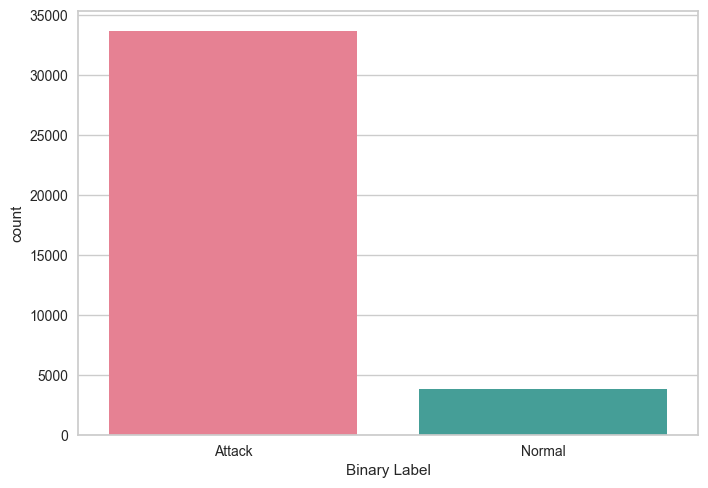

In [5]:
# Display "Binary Label" column
sns.countplot(data=data, x="Binary Label", palette="husl")

<Axes: xlabel='Label', ylabel='count'>

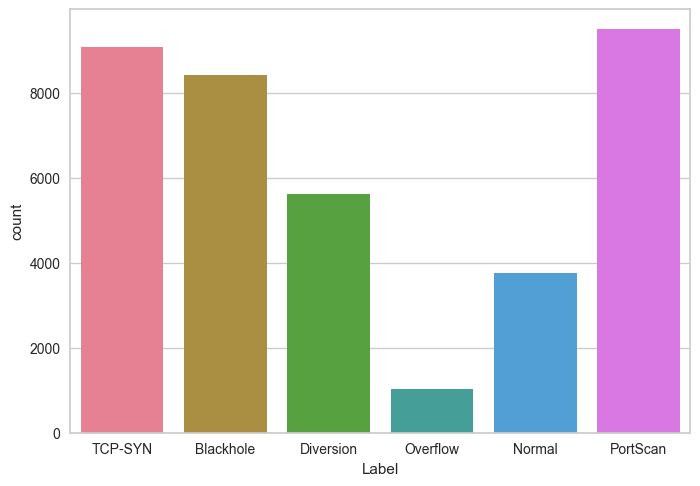

In [6]:
# Display "Label" column
sns.countplot(data=data, x="Label", palette="husl")

In [9]:
#Split Attack and Normal from the dataframe 
data_attack = data[data['Binary Label'] == 'Attack']

#Optional
#data_normal = data[data['Binary Label'] == 'Normal']

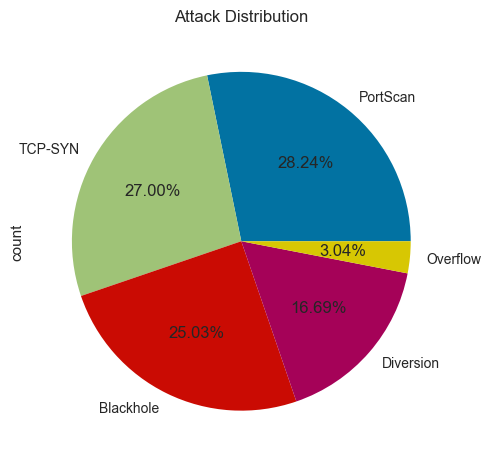

In [10]:
# Display attack distribution in pie chart
data_attack['Label'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Attack Distribution")
plt.show()

In [22]:
# Feature selection
feature = data_attack.drop(['Switch ID','Port Number','Packets Rx Dropped','Packets Tx Dropped','Packets Rx Errors','Packets Tx Errors',
                  'Delta Packets Rx Dropped',' Delta Packets Tx Dropped','Delta Packets Rx Errors','Delta Packets Tx Errors',
                  'is_valid','Table ID','Max Size','Binary Label', 'Active Flow Entries', 'Delta Port alive Duration (S)'], axis=1)
feature.dtypes

Received Packets            int64
Received Bytes              int64
Sent Bytes                  int64
Sent Packets                int64
Port alive Duration (S)     int64
Delta Received Packets      int64
Delta Received Bytes        int64
Delta Sent Bytes            int64
Delta Sent Packets          int64
Connection Point            int64
Total Load/Rate             int64
Total Load/Latest           int64
Unknown Load/Rate           int64
Unknown Load/Latest         int64
Latest bytes counter        int64
Packets Looked Up           int64
Packets Matched             int64
Label                      object
dtype: object

## Setup

In [23]:
# Prepare the pipeline using pycaret
clf = ClassificationExperiment()
clf.setup(feature, target = 'Label', fix_imbalance = SMOTETomek())

,Description,Value
0,Session id,2974
1,Target,Label
2,Target type,Multiclass
3,Target mapping,"Blackhole: 0, Diversion: 1, Overflow: 2, PortScan: 3, TCP-SYN: 4"
4,Original data shape,"(33637, 18)"
5,Transformed data shape,"(43337, 18)"
6,Transformed train set shape,"(33245, 18)"
7,Transformed test set shape,"(10092, 18)"
8,Numeric features,17
9,Preprocess,True


## Compare Models

In [24]:
# Compare machine learning algorithm
best = clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9356,0.9946,0.9356,0.9360,0.9357,0.9148,0.9148,0.7640
lightgbm,Light Gradient Boosting Machine,0.9345,0.9943,0.9345,0.9350,0.9346,0.9133,0.9134,0.9630
et,Extra Trees Classifier,0.9304,0.9923,0.9304,0.9312,0.9307,0.9079,0.9080,0.7300
rf,Random Forest Classifier,0.9233,0.9920,0.9233,0.9242,0.9235,0.8984,0.8985,1.6570
catboost,CatBoost Classifier,0.9180,0.9922,0.9180,0.9186,0.9182,0.8915,0.8916,11.6440
dt,Decision Tree Classifier,0.8889,0.9270,0.8889,0.8905,0.8895,0.8533,0.8533,0.2360
gbc,Gradient Boosting Classifier,0.8672,0.0000,0.8672,0.8728,0.8687,0.8247,0.8254,12.3970
knn,K Neighbors Classifier,0.7734,0.9401,0.7734,0.7874,0.7781,0.7035,0.7044,0.3190
ridge,Ridge Classifier,0.6658,0.0000,0.6658,0.8078,0.7115,0.5782,0.5940,0.1390
qda,Quadratic Discriminant Analysis,0.6415,0.0000,0.6415,0.7573,0.6608,0.5463,0.5681,0.1350


In [25]:
# Display the best machine learning metrics
print(best)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)


## Analyze Model

In [26]:
# Train and test the model
clf.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

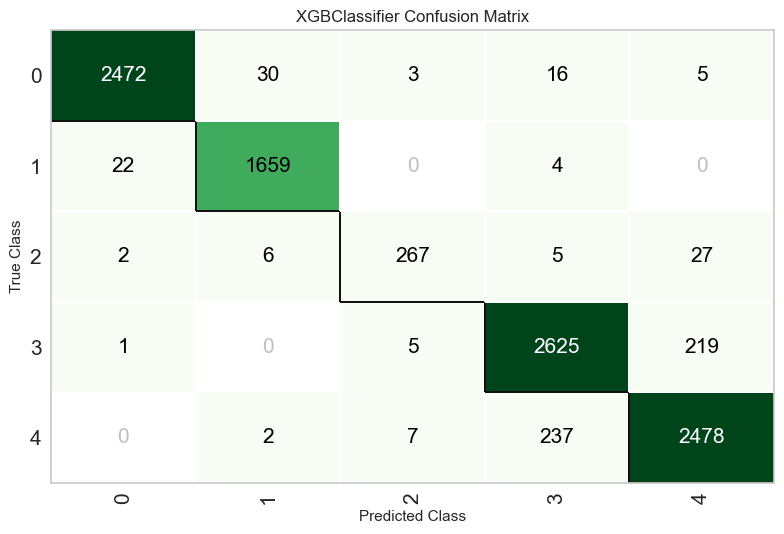

In [27]:
# Plot the confusion matrix of the model
clf.plot_model(best, plot = 'confusion_matrix')

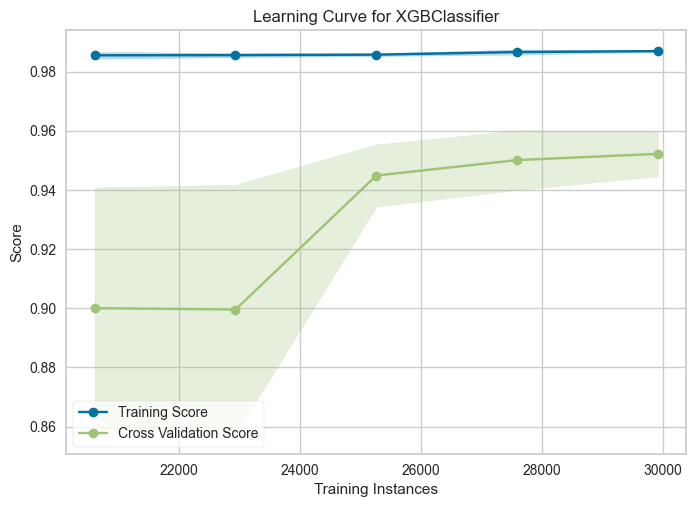

In [28]:
# Plot the learning curve of XGBoost
clf.plot_model(best, plot = 'learning')

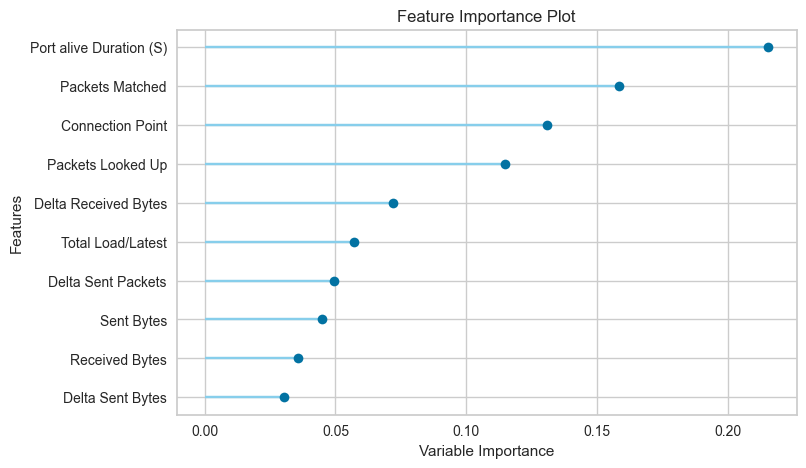

In [29]:
# Plot feature importance from the model
clf.plot_model(best, plot = 'feature')

## Predictions

In [30]:
# Do prediction use model
clf.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9414,0.9951,0.9414,0.9417,0.9415,0.9225,0.9225


,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Packets Looked Up,Packets Matched,Label,prediction_label,prediction_score
14538,2153,19111542,94838238,5491,1936,4,556,5922,85,3,465,7700,465,7700,465,10966,10834,Blackhole,Blackhole,0.9973
32240,209181,23908291,27212,207,251,12039,651405,278,2,1,0,0,0,0,0,210544,210431,PortScan,PortScan,0.9995
17912,1858,19079845,25402619,2316,1732,4,556,556,4,3,0,0,0,0,0,6439,6284,Diversion,Diversion,0.8486
1490,568,12629231,6396977,1746,116,70,2364485,5848,102,3,486,78246,486,78246,486,2698,2594,TCP-SYN,TCP-SYN,0.9934
30142,149,12999,6653309,13877,26,112,7656,6647966,13840,2,0,0,0,0,0,14093,14004,PortScan,PortScan,0.9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28058,57,7924,7924,57,46,2,278,278,2,2,0,0,0,0,0,392,309,PortScan,PortScan,0.7268
28445,65481,3548221,6320823,298,146,5,598,560,4,3,0,6303287,0,6303287,0,131162,131056,PortScan,PortScan,0.9998
17233,724,12632933,19009149,1397,867,0,0,626,5,2,0,0,0,0,0,6093,5974,Blackhole,Blackhole,0.8515
9257,1112,18951124,31698580,2375,1707,0,0,560,4,1,0,0,0,0,0,9437,9311,Blackhole,Blackhole,1.0000


## Save the model

In [31]:
# Save the model using pickle
clf.save_model(best, 'unr-idd_best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Received Packets',
                                              'Received Bytes', 'Sent Bytes',
                                              'Sent Packets',
                                              'Port alive Duration (S)',
                                              'Delta Received Packets',
                                              'Delta Received Bytes',
                                              'Delta Sent Byt...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_thre

To load the model back in environment:

In [32]:
# Load the model
loaded_model = clf.load_model('unr-idd_best_model')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Rajasa\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Received Packets',
                                             'Received Bytes', 'Sent Bytes',
                                             'Sent Packets',
                                             'Port alive Duration (S)',
                                             'Delta Received Pa...
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_oneh